In [1]:
# Project RNN

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
text = "hellohellohello"

chars = sorted(list(set(text)))
char_to_index = {c: i for i, c in enumerate(chars)}
index_to_char = {i:c for i, c in enumerate(chars)}

seq_length = 4
x = []
y = []
for i in range(len(text) - seq_length):
    input_seq = text[i: i+seq_length]
    output_char = text[i + seq_length]
    x.append([char_to_index[char]for char in input_seq])
    y.append(char_to_index[output_char])

x = np.array(x)
y = np.array(y)
x = np.eye(len(chars))[x]
y = np.eye(len(chars))[y]


In [3]:
model = Sequential()
model.add(SimpleRNN(16, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404 (1.58 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

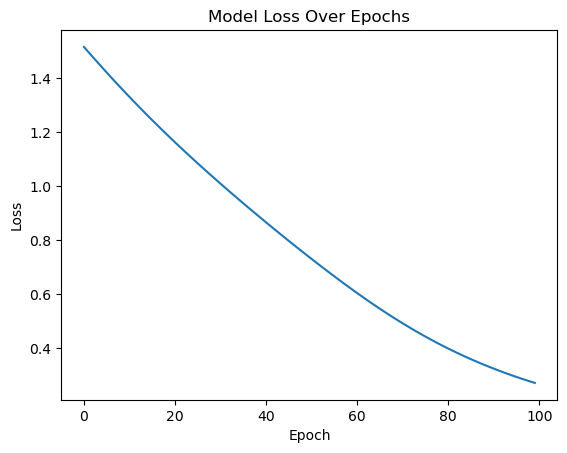

In [4]:
history = model.fit(x, y, epochs=100, verbose=0)
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [5]:
test_seq = "hell"
test_input = np.array([[char_to_index[char] for char in test_seq]])
test_input = np.eye(len(chars))[test_input]
prediction = model.predict(test_input, verbose = 0)
predicted_index = np.argmax(prediction)
predicted_char = index_to_char[predicted_index]
print(f"Input: {test_seq }-> Predicted next char: {predicted_char}")

Input: hell-> Predicted next char: o
